Problem Statement: 
Evaluate stocks of GLAXO and BEML.
The daily trading data (Open and Close Price)
For each stock is taken for the period starting from 2010 to 2016 from BSE site(www.bseindia.com)

Questions to be answered:
1. What is the expected daily rate of returns of these stocks?
2. What stocks have higher risk or volatility as far as daily returns are concerned?
3. What stock has hogher probability of making a daily return of 2% or more?
4. What stock has higher probability of making a loss (risk) of 2% or more?

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
beml_ = pd.read_csv("BEML.csv")
beml_.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [3]:
glaxo_ = pd.read_csv("GLAXO.csv")
glaxo_.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [4]:
beml_df = beml_[['Date', 'Close']]
glaxo_df = glaxo_[['Date', 'Close']]

In [5]:
#beml_df.set_index('Date', inplace=True)
#glaxo_df.set_index('Date', inplace=True)
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

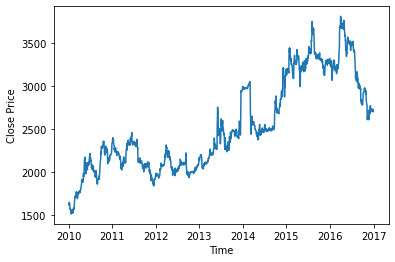

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

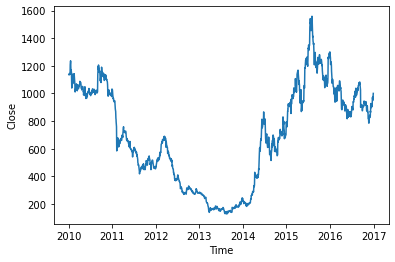

In [7]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

#### Expected Daily returns on GLAXO

In [8]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
#drop first row since it is NaN
glaxo_df = glaxo_df.dropna()
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398
2010-01-11,2010-01-11,1629.45,-0.006312


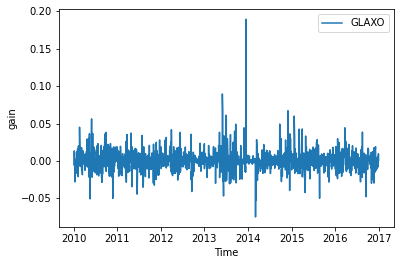

In [9]:
plt.plot(glaxo_df.index, glaxo_df.gain, label = "GLAXO")
plt.xlabel('Time')
plt.ylabel('gain')
plt.legend()

#### Expected Daily Returns on BEML

In [10]:
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)
beml_df = beml_df.dropna()
beml_df.head()

,Date,Close,gain
Date,,,
2010-01-05,2010-01-05,1134.60,-0.000881
2010-01-06,2010-01-06,1139.60,0.004407
2010-01-07,2010-01-07,1144.15,0.003993
2010-01-08,2010-01-08,1144.05,-0.000087
2010-01-11,2010-01-11,1137.00,-0.006162


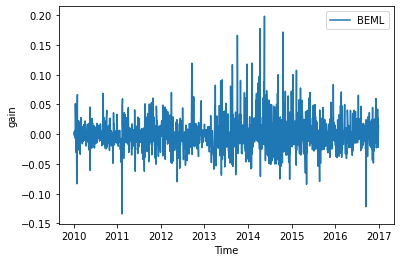

In [11]:
plt.plot(beml_df.index, beml_df.gain, label = "BEML")
plt.xlabel('Time')
plt.ylabel('gain')
plt.legend()

## Comparison of Expected daily returns by both Stocks

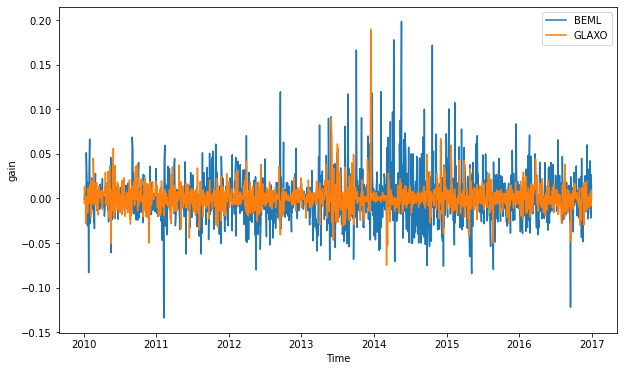

In [12]:
fig, axs = plt.subplots()
plt.plot(beml_df.index, beml_df.gain, label = "BEML")
plt.plot(glaxo_df.index, glaxo_df.gain, label = "GLAXO")
plt.xlabel('Time')
plt.ylabel('gain')
plt.legend()
fig.set_size_inches(10,6)

Gain comparison

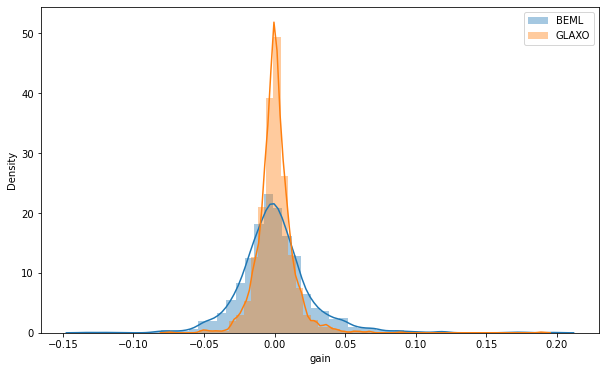

In [13]:
fig, ax = plt.subplots()
sn.distplot(beml_df.gain, label = "BEML", ax=ax)
sn.distplot(glaxo_df.gain, label = "GLAXO", ax=ax)
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()
fig.set_size_inches(10,6)



In [14]:
print('Mean:', round(glaxo_df.gain.mean(), 4))
print('Standard Deviation: ', round(glaxo_df.gain.std(), 4))

Mean: 0.0004
Standard Deviation:  0.0134


In [15]:
print('Mean: ', round(beml_df.gain.mean(), 4))
print('Standard Deviation: ', round(beml_df.gain.std(), 4))

Mean:  0.0003
Standard Deviation:  0.0264


#### Compute 2% loss or gain for GLAXO

In [16]:
from scipy import stats
#Probability of making 2% loss or higher in Glaxo
stats.norm.cdf( -0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.06352488667177397

In [17]:
#Probability of making 2% gain or higher in Glaxo
1 - stats.norm.cdf(0.02,
loc=glaxo_df.gain.mean(),
scale=glaxo_df.gain.std())

0.07104511457618568

#### Compute 2% loss or gain for BEML

In [18]:
stats.norm.cdf( -0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22155987503755292

In [19]:
1 - stats.norm.cdf(0.02,
loc=beml_df.gain.mean(),
scale=beml_df.gain.std())

0.22769829484075343